In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

csfont = {'fontname':'Times New Roman'}

### Load the data

In [80]:
aas_parkering = pd.read_csv('data/aas-parkering.csv', delimiter='\t')
aas_stasjon = pd.read_csv('data/aas-stasjon.csv', delimiter='\t')
moss_parkering = pd.read_csv('data/moss-parkering.csv', delimiter='\t')
moss_stasjon = pd.read_csv('data/moss-stasjon.csv', delimiter='\t')

aas_parkering.head()

,0/1/2,Kategori
0,0,Belysning
1,2,Belysning
2,0,Belysning
3,2,Belysning
4,2,Lesbarhet og tilgang


### Some preprocessing

In [81]:
# Switch the order of the columns
aas_parkering = aas_parkering[["Kategori"] + list(aas_parkering.columns[:-1])]
aas_stasjon = aas_stasjon[["Kategori"] + list(aas_stasjon.columns[:-1])]
moss_parkering = moss_parkering[["Kategori"] + list(moss_parkering.columns[:-1])]
moss_stasjon = moss_stasjon[["Kategori"] + list(moss_stasjon.columns[:-1])]

def clean_kategori(df):
    df["Kategori"] = df["Kategori"].str.strip().str.lower().str.capitalize()
    return df

aas_parkering = clean_kategori(aas_parkering)
aas_stasjon = clean_kategori(aas_stasjon)
moss_parkering = clean_kategori(moss_parkering)
moss_stasjon = clean_kategori(moss_stasjon)

# Averageing values for each category
data_aas_parkering = aas_parkering.groupby("Kategori", as_index=False).mean()
data_aas_stasjon = aas_stasjon.groupby("Kategori", as_index=False).mean()
data_moss_parkering = moss_parkering.groupby("Kategori", as_index=False).mean()
data_moss_stasjon = moss_stasjon.groupby("Kategori", as_index=False).mean()

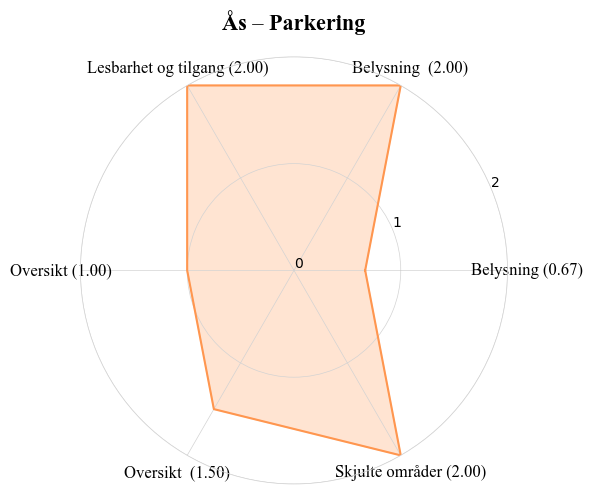

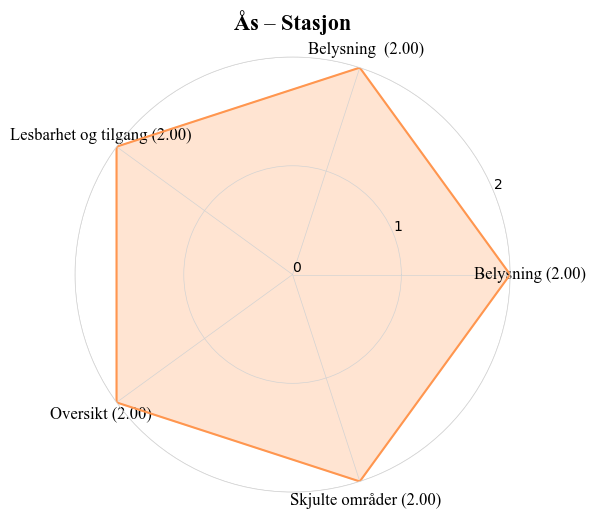

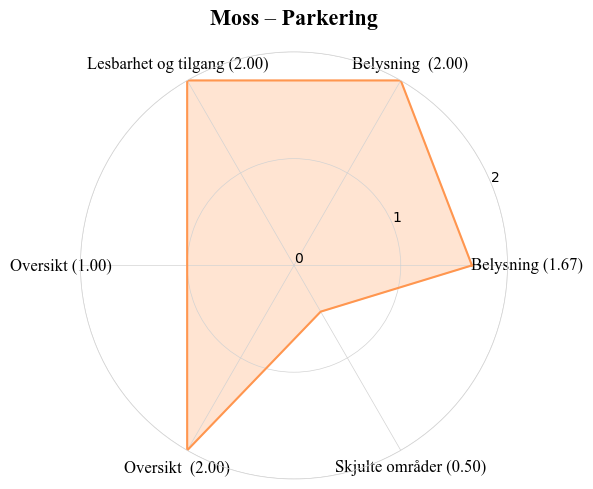

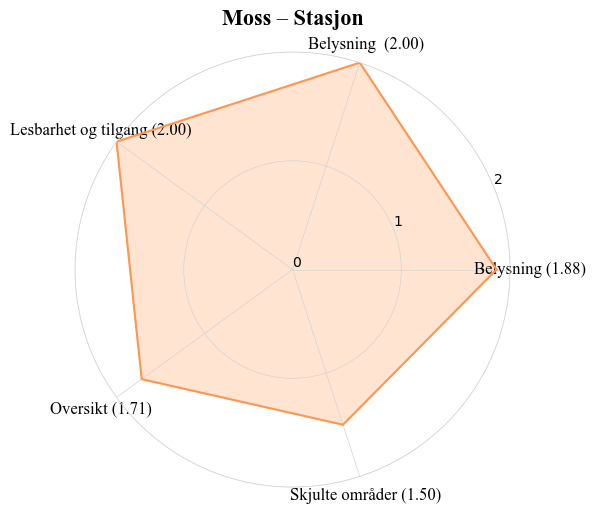

In [82]:
def spider_plot_single_row(df, title="Spider plot"):
    labels = [f"{cat} ({val:.2f})" for cat, val in zip(df["Kategori"], df["0/1/2"])]
    scores = df["0/1/2"].tolist()

    scores += scores[:1]
    angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

    ax.plot(angles, scores, color='#FF964F')
    ax.fill(angles, scores, color='#FF964F', alpha=0.25)

    ax.yaxis.grid(True, color="lightgray", linestyle="solid", linewidth=0.5)
    ax.xaxis.grid(True, color="lightgray", linestyle="solid", linewidth=0.5)
    ax.spines['polar'].set_color("lightgray")
    ax.spines['polar'].set_linewidth(0.5)

    ax.set_thetagrids(np.degrees(angles[:-1]), labels, fontsize=12, **csfont)

    ax.set_title(title, fontsize=16, fontweight='bold', pad=20, **csfont)
    ax.set_ylim(0, 2)
    ax.set_yticks([0, 1, 2])
    ax.set_yticklabels(["0", "1", "2"], fontsize=10)

    plt.tight_layout()
    plt.show()


spider_plot_single_row(data_aas_parkering, title="Ås – Parkering")
spider_plot_single_row(data_aas_stasjon, title="Ås – Stasjon")
spider_plot_single_row(data_moss_parkering, title="Moss – Parkering")
spider_plot_single_row(data_moss_stasjon, title="Moss – Stasjon")